# Purpose: Plotting the results of cluster analysis of the Pareto set.

In [4]:
# Loading
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. User input

## 1.1 Input and format Pareto optimal results

Load optimisation results

In [5]:
opdata = pd.read_pickle("Data/opdata")

Load objectives individually

In [6]:
obj1 = pd.read_pickle("Data/obj1")
obj2 = pd.read_pickle("Data/obj2")
obj3 = pd.read_pickle("Data/obj3")

## 1.2 Set plotting parameters

Set ticks for plots

In [7]:
obj1ticks = [150,250,350,450]
obj2ticks = [5200,5300,5400,5500]
obj3ticks = [350,450,550]

Set objective names for charts (including arrows for direction of preference: right is maximised, left is minimised)

In [8]:
obj1chartname = 'Minimum Storage (GL) %s' % r'$\longrightarrow$'
obj2chartname = '%s Total Cost (%s million)' % (r'$\longleftarrow$', r'$\$$')
obj3chartname = '%s Total Spill (GL)' % r'$\longleftarrow$'

## 1.3 Input and format cluster analysis results

Enter medoids. 

Three cluster sets based on objectives, decision variables, and normalised objectives + decision variables respectively.

In [25]:
medobj1 = pd.read_pickle("Data/medobj1")
medobj2 = pd.read_pickle("Data/medobj2")
medobj3 = pd.read_pickle("Data/medobj3")

In [9]:
dvmedobj1 = pd.read_pickle("Data/dvmedobj1")
dvmedobj2 = pd.read_pickle("Data/dvmedobj2")
dvmedobj3 = pd.read_pickle("Data/dvmedobj3")

In [10]:
allmedobj1 = pd.read_pickle("Data/allmedobj1")
allmedobj2 = pd.read_pickle("Data/allmedobj2")
allmedobj3 = pd.read_pickle("Data/allmedobj3")

Enter medoid index (index of options that are medoids). Ensure these are the same index ref as opdata.

Three cluster sets based on objectives, decision variables, and normalised objectives + decision variables respectively.

In [26]:
medindex = pd.read_pickle("Data/medindex")

In [11]:
dvmedindex = pd.read_pickle("Data/dvmedindex")

In [12]:
allmedindex = pd.read_pickle("Data/allmedindex")

## 1.4 Specify cluster colours

Import from pickle to make consistent across plots

In [13]:
clustcols = pd.read_pickle('Data/clustercolours')

## 1.5 Enter list of colours for plotting

Each decision option is assigned a colour based on cluster membership (clusternos.csv)

Import from pickle to make consistent across plots

Three cluster sets based on objectives, decision variables, and normalised objectives + decision variables respectively.

In [27]:
clustcollist = pd.read_pickle('Data/clustcollist')

In [15]:
dvclustcollist = pd.read_pickle('Data/dvclustcollist')

In [16]:
allclustcollist = pd.read_pickle('Data/allclustcollist')

# 2. Execution

## 2.1 Print list of medoids for reference and identification of values

Three cluster sets based on objectives, decision variables, and normalised objectives + decision variables respectively.

In [28]:
# 1 is added to reported medoid number since Python counts from 0 and we wish to count from 1
# option number still starts from 0.
for i in medindex.index:
    print 'Option %d is Medoid %d with %s %d, %s %d, and %s %d' % (medindex[i], i+1, obj1.name, obj1[medindex[i]], 
                                                                   obj2.name, obj2[medindex[i]], 
                                                                   obj3.name, obj3[medindex[i]])

Option 243 is Medoid 1 with Minimum System Storage (GL) 428, Total Cost ($ million) 5502, and Total Spill Volume (GL) 500
Option 218 is Medoid 2 with Minimum System Storage (GL) 344, Total Cost ($ million) 5207, and Total Spill Volume (GL) 339
Option 642 is Medoid 3 with Minimum System Storage (GL) 304, Total Cost ($ million) 5340, and Total Spill Volume (GL) 315
Option 431 is Medoid 4 with Minimum System Storage (GL) 423, Total Cost ($ million) 5510, and Total Spill Volume (GL) 417
Option 70 is Medoid 5 with Minimum System Storage (GL) 159, Total Cost ($ million) 5276, and Total Spill Volume (GL) 305
Option 347 is Medoid 6 with Minimum System Storage (GL) 404, Total Cost ($ million) 5421, and Total Spill Volume (GL) 426
Option 666 is Medoid 7 with Minimum System Storage (GL) 266, Total Cost ($ million) 5458, and Total Spill Volume (GL) 306
Option 602 is Medoid 8 with Minimum System Storage (GL) 209, Total Cost ($ million) 5350, and Total Spill Volume (GL) 306
Option 509 is Medoid 9 wi

In [18]:
# 1 is added to reported medoid number since Python counts from 0 and we wish to count from 1
# option number still starts from 0.
for i in dvmedindex.index:
    print 'Option %d is Medoid %d with %s %d, %s %d, and %s %d' % (dvmedindex[i], i+1, obj1.name, obj1[dvmedindex[i]], 
                                                                   obj2.name, obj2[dvmedindex[i]], 
                                                                   obj3.name, obj3[dvmedindex[i]])

Option 295 is Medoid 1 with Minimum System Storage (GL) 430, Total Cost ($ million) 5506, and Total Spill Volume (GL) 494
Option 74 is Medoid 2 with Minimum System Storage (GL) 331, Total Cost ($ million) 5186, and Total Spill Volume (GL) 328
Option 476 is Medoid 3 with Minimum System Storage (GL) 385, Total Cost ($ million) 5444, and Total Spill Volume (GL) 330
Option 390 is Medoid 4 with Minimum System Storage (GL) 269, Total Cost ($ million) 5237, and Total Spill Volume (GL) 314
Option 658 is Medoid 5 with Minimum System Storage (GL) 412, Total Cost ($ million) 5417, and Total Spill Volume (GL) 460
Option 355 is Medoid 6 with Minimum System Storage (GL) 135, Total Cost ($ million) 5249, and Total Spill Volume (GL) 304
Option 11 is Medoid 7 with Minimum System Storage (GL) 157, Total Cost ($ million) 5279, and Total Spill Volume (GL) 303
Option 373 is Medoid 8 with Minimum System Storage (GL) 340, Total Cost ($ million) 5219, and Total Spill Volume (GL) 326
Option 518 is Medoid 9 wit

In [19]:
# 1 is added to reported medoid number since Python counts from 0 and we wish to count from 1
# option number still starts from 0.
for i in allmedindex.index:
    print 'Option %d is Medoid %d with %s %d, %s %d, and %s %d' % (allmedindex[i], i+1, obj1.name, obj1[allmedindex[i]], 
                                                                   obj2.name, obj2[allmedindex[i]], 
                                                                   obj3.name, obj3[allmedindex[i]])

Option 295 is Medoid 1 with Minimum System Storage (GL) 430, Total Cost ($ million) 5506, and Total Spill Volume (GL) 494
Option 74 is Medoid 2 with Minimum System Storage (GL) 331, Total Cost ($ million) 5186, and Total Spill Volume (GL) 328
Option 440 is Medoid 3 with Minimum System Storage (GL) 419, Total Cost ($ million) 5483, and Total Spill Volume (GL) 466
Option 441 is Medoid 4 with Minimum System Storage (GL) 307, Total Cost ($ million) 5352, and Total Spill Volume (GL) 317
Option 658 is Medoid 5 with Minimum System Storage (GL) 412, Total Cost ($ million) 5417, and Total Spill Volume (GL) 460
Option 11 is Medoid 6 with Minimum System Storage (GL) 157, Total Cost ($ million) 5279, and Total Spill Volume (GL) 303
Option 463 is Medoid 7 with Minimum System Storage (GL) 209, Total Cost ($ million) 5352, and Total Spill Volume (GL) 302
Option 447 is Medoid 8 with Minimum System Storage (GL) 361, Total Cost ($ million) 5224, and Total Spill Volume (GL) 358
Option 641 is Medoid 9 wit

## 2.2 Create category and markers to identify cluster medoids for plotting

Create list to identify medoids

Three cluster sets based on objectives, decision variables, and normalised objectives + decision variables respectively.

In [29]:
medcat = {}
for i in range(len(obj1)):
    if any(medindex == i):
        medcat[i] = 1
    else:
        medcat[i] = 0

In [20]:
dvmedcat = {}
for i in range(len(obj1)):
    if any(dvmedindex == i):
        dvmedcat[i] = 1
    else:
        dvmedcat[i] = 0

In [21]:
allmedcat = {}
for i in range(len(obj1)):
    if any(allmedindex == i):
        allmedcat[i] = 1
    else:
        allmedcat[i] = 0

Create medoid marker pool to identify medoids

In [22]:
medmarks = {0:'.', 1:'o'}

## 2.3 Create 3D Objective Scatterplot

Plot is coloured according to cluster, and medoids are indicated by larger markers

Shown for objective cluster set only.

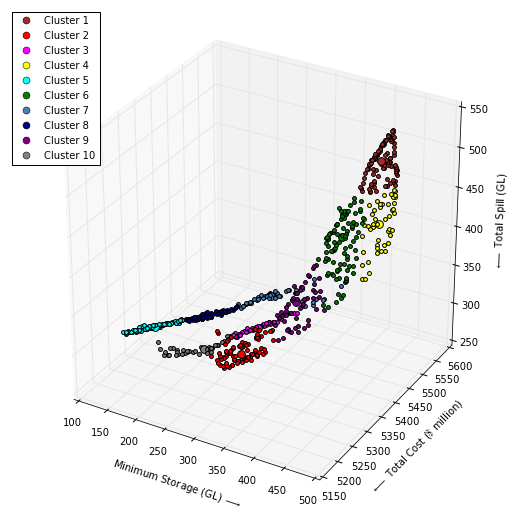

In [30]:
fig = plt.figure(figsize = [7,7])
ax = fig.add_subplot(1,1,1)
ax = Axes3D(fig)

# plot points with colours according to cluster number and markers according to medoid/not medoid
for i in medcat:
    ax.scatter(obj1[i], obj2[i], obj3[i], s = 60, c = clustcollist[i], marker = medmarks[medcat[i]])

# create legend for clusters with points (coloured circles) and labels (cluster number)
legpts = []    
leglabs = []
for i in range(0, len(medobj1)):
    legpt = mpl.lines.Line2D([0], [0], marker = 'o', ms = 7, color = clustcols[i], linestyle = 'none')
    legpts.append(legpt)
    leglab = 'Cluster %d' % (i + 1)
    leglabs.append(leglab)
ax.legend(legpts, leglabs, numpoints = 1, fontsize = 'medium', loc = 'upper left')

# axes labels
ax.set_xlabel(obj1chartname, labelpad = 10)
ax.set_ylabel(obj2chartname, labelpad = 10)
ax.set_zlabel(obj3chartname, labelpad = 10)

# uncheck below to save figure
#plt.savefig('Cluster Analysis/scatterplot pareto front clustered markers.png', dpi=150, bbox_inches='tight')

In [31]:
plt.close(fig)

## 2.4 Create Clustered Scatterplot Matrix

3x3 pairwise plots of objective functions, coloured according to cluster and medoids indicated by larger markers. 
Histograms of each objective function on the diagonal.

For three cluster sets based on objectives, decision variables, and normalised objectives + decision variables respectively.

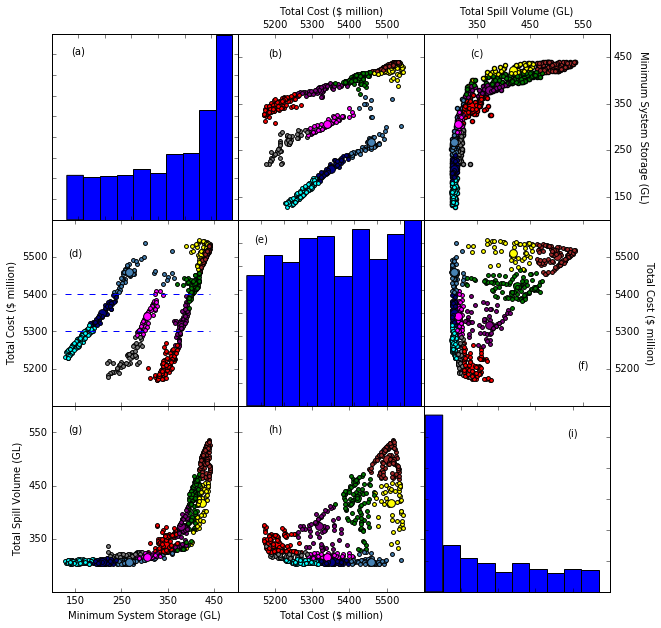

In [36]:
# Objective cluster set

fig, axes = plt.subplots(3, 3, figsize = [10,10])

# 1. Obj1 Histogram (Obj1 vs Obj1)
axes[0,0].hist(obj1, color = 'blue')
plt.setp(axes[0,0].get_xticklabels(), visible=False)
plt.setp(axes[0,0].get_yticklabels(), visible=False)
axes[0,0].text(min(axes[0,0].get_xticks()[1:]), max(axes[0,0].get_yticks()[:-1]), '(a)', ha = 'center')

# 2. Obj1 vs Obj2
for i in medcat:
    axes[0,1].scatter(obj2[i], obj1[i], s = 60, c = clustcollist[i], marker = medmarks[medcat[i]])
axes[0,1].xaxis.tick_top()
axes[0,1].set_xticks(obj2ticks)
axes[0,1].xaxis.set_label_position('top')
axes[0,1].set_xlabel(obj2.name)
axes[0,1].set_yticks(obj1ticks)
plt.setp(axes[0,1].get_yticklabels(), visible=False)
axes[0,1].text(min(obj2ticks), max(obj1ticks), '(b)', ha = 'center')

# 3. Obj1 vs Obj3
axes[0,2].scatter(obj3, obj1)
for i in medcat:
    axes[0,2].scatter(obj3[i], obj1[i], s = 60, c = clustcollist[i], marker = medmarks[medcat[i]])
axes[0,2].xaxis.tick_top()
axes[0,2].set_xticks(obj3ticks)
axes[0,2].xaxis.set_label_position('top')
axes[0,2].set_xlabel(obj3.name)
axes[0,2].yaxis.tick_right()
axes[0,2].set_yticks(obj1ticks)
axes[0,2].yaxis.set_label_position('right')
axes[0,2].set_ylabel(obj1.name, rotation = 270, va = 'bottom')
axes[0,2].text(min(obj3ticks), max(obj1ticks), '(c)', ha = 'center')
    
# 4. Obj2 vs Obj1
for i in medcat:
    axes[1,0].scatter(obj1[i], obj2[i], s = 60, c = clustcollist[i], marker = medmarks[medcat[i]])
axes[1,0].hlines([5300, 5400], obj1.min(), obj1.max(), colors = ['blue','blue'], linestyle = 'dashed')
axes[1,0].set_xticks(obj1ticks)
plt.setp(axes[1,0].get_xticklabels(), visible=False)
axes[1,0].set_yticks(obj2ticks)
axes[1,0].set_ylabel(obj2.name)
axes[1,0].text(min(obj1ticks), max(obj2ticks), '(d)', ha = 'center')

# 5. Obj2 Histogram (Obj 2 vs Obj 2)
axes[1,1].hist(obj2, color = 'blue')
plt.setp(axes[1,1].get_xticklabels(), visible=False)
plt.setp(axes[1,1].get_yticklabels(), visible=False)
axes[1,1].text(min(axes[1,1].get_xticks()[1:]), max(axes[1,1].get_yticks()[:-1]), '(e)', ha = 'center')

# 6. Obj2 vs Obj 3
for i in medcat:
    axes[1,2].scatter(obj3[i], obj2[i], s = 60, c = clustcollist[i], marker = medmarks[medcat[i]])
axes[1,2].set_xticks(obj3ticks)
plt.setp(axes[1,2].get_xticklabels(), visible=False)
axes[1,2].yaxis.tick_right()
axes[1,2].set_yticks(obj2ticks)
axes[1,2].yaxis.set_label_position('right')
axes[1,2].set_ylabel(obj2.name, rotation = 270, va = 'bottom')
axes[1,2].text(max(obj3ticks), min(obj2ticks), '(f)', ha = 'center')

# 7. Obj3 vs Obj1
for i in medcat:
    axes[2,0].scatter(obj1[i], obj3[i], s = 60, c = clustcollist[i], marker = medmarks[medcat[i]])
axes[2,0].set_xticks(obj1ticks)
axes[2,0].set_xlabel(obj1.name)
axes[2,0].set_yticks(obj3ticks)
axes[2,0].set_ylabel(obj3.name)
axes[2,0].text(min(obj1ticks), max(obj3ticks), '(g)', ha = 'center')

# 8. Obj3 vs Obj2
for i in medcat:
    axes[2,1].scatter(obj2[i], obj3[i], s = 60, c = clustcollist[i], marker = medmarks[medcat[i]])
axes[2,1].set_xticks(obj2ticks)
axes[2,1].set_xlabel(obj2.name)
axes[2,1].set_yticks(obj3ticks)
plt.setp(axes[2,1].get_yticklabels(), visible=False)
axes[2,1].text(min(obj2ticks), max(obj3ticks), '(h)', ha = 'center')

# 9. Obj3 Histogram (Obj3 vs Obj3)
axes[2,2].hist(obj3, color = 'blue')
plt.setp(axes[2,2].get_xticklabels(), visible=False)
plt.setp(axes[2,2].get_yticklabels(), visible=False)
axes[2,2].text(max(axes[2,2].get_xticks()[:-1]), max(axes[2,2].get_yticks()[:-1]), '(i)', ha = 'center')

# Adjust surrounding space 
plt.subplots_adjust(wspace = 0, hspace = 0)

# uncheck below to save figure
#plt.savefig('Cluster Analysis/scatterplot matrix pareto front clustered.png', dpi=150, bbox_inches='tight')

In [39]:
plt.close(fig)

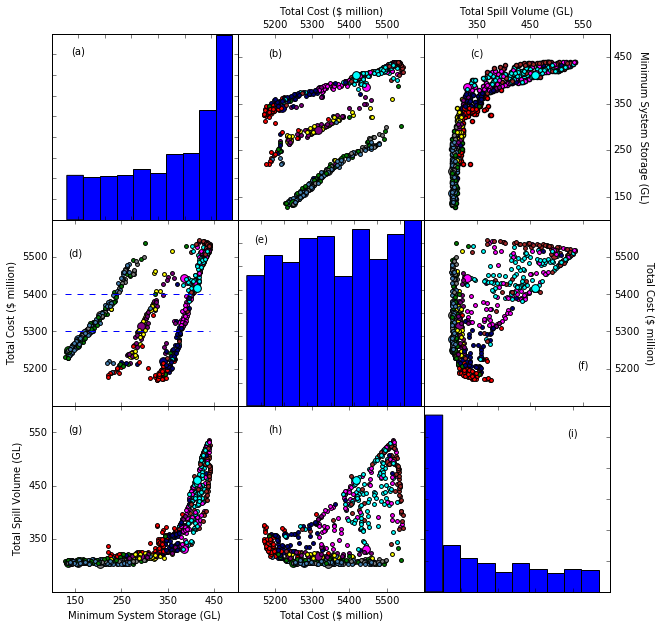

In [37]:
# Decision variable cluster set

fig, axes = plt.subplots(3, 3, figsize = [10,10])

# 1. Obj1 Histogram (Obj1 vs Obj1)
axes[0,0].hist(obj1, color = 'blue')
plt.setp(axes[0,0].get_xticklabels(), visible=False)
plt.setp(axes[0,0].get_yticklabels(), visible=False)
axes[0,0].text(min(axes[0,0].get_xticks()[1:]), max(axes[0,0].get_yticks()[:-1]), '(a)', ha = 'center')

# 2. Obj1 vs Obj2
for i in medcat:
    axes[0,1].scatter(obj2[i], obj1[i], s = 60, c = dvclustcollist[i], marker = medmarks[dvmedcat[i]])
axes[0,1].xaxis.tick_top()
axes[0,1].set_xticks(obj2ticks)
axes[0,1].xaxis.set_label_position('top')
axes[0,1].set_xlabel(obj2.name)
axes[0,1].set_yticks(obj1ticks)
plt.setp(axes[0,1].get_yticklabels(), visible=False)
axes[0,1].text(min(obj2ticks), max(obj1ticks), '(b)', ha = 'center')

# 3. Obj1 vs Obj3
axes[0,2].scatter(obj3, obj1)
for i in medcat:
    axes[0,2].scatter(obj3[i], obj1[i], s = 60, c = dvclustcollist[i], marker = medmarks[dvmedcat[i]])
axes[0,2].xaxis.tick_top()
axes[0,2].set_xticks(obj3ticks)
axes[0,2].xaxis.set_label_position('top')
axes[0,2].set_xlabel(obj3.name)
axes[0,2].yaxis.tick_right()
axes[0,2].set_yticks(obj1ticks)
axes[0,2].yaxis.set_label_position('right')
axes[0,2].set_ylabel(obj1.name, rotation = 270, va = 'bottom')
axes[0,2].text(min(obj3ticks), max(obj1ticks), '(c)', ha = 'center')
    
# 4. Obj2 vs Obj1
for i in medcat:
    axes[1,0].scatter(obj1[i], obj2[i], s = 60, c = dvclustcollist[i], marker = medmarks[dvmedcat[i]])
axes[1,0].hlines([5300, 5400], obj1.min(), obj1.max(), colors = ['blue','blue'], linestyle = 'dashed')
axes[1,0].set_xticks(obj1ticks)
plt.setp(axes[1,0].get_xticklabels(), visible=False)
axes[1,0].set_yticks(obj2ticks)
axes[1,0].set_ylabel(obj2.name)
axes[1,0].text(min(obj1ticks), max(obj2ticks), '(d)', ha = 'center')

# 5. Obj2 Histogram (Obj 2 vs Obj 2)
axes[1,1].hist(obj2, color = 'blue')
plt.setp(axes[1,1].get_xticklabels(), visible=False)
plt.setp(axes[1,1].get_yticklabels(), visible=False)
axes[1,1].text(min(axes[1,1].get_xticks()[1:]), max(axes[1,1].get_yticks()[:-1]), '(e)', ha = 'center')

# 6. Obj2 vs Obj 3
for i in medcat:
    axes[1,2].scatter(obj3[i], obj2[i], s = 60, c = dvclustcollist[i], marker = medmarks[dvmedcat[i]])
axes[1,2].set_xticks(obj3ticks)
plt.setp(axes[1,2].get_xticklabels(), visible=False)
axes[1,2].yaxis.tick_right()
axes[1,2].set_yticks(obj2ticks)
axes[1,2].yaxis.set_label_position('right')
axes[1,2].set_ylabel(obj2.name, rotation = 270, va = 'bottom')
axes[1,2].text(max(obj3ticks), min(obj2ticks), '(f)', ha = 'center')

# 7. Obj3 vs Obj1
for i in medcat:
    axes[2,0].scatter(obj1[i], obj3[i], s = 60, c = dvclustcollist[i], marker = medmarks[dvmedcat[i]])
axes[2,0].set_xticks(obj1ticks)
axes[2,0].set_xlabel(obj1.name)
axes[2,0].set_yticks(obj3ticks)
axes[2,0].set_ylabel(obj3.name)
axes[2,0].text(min(obj1ticks), max(obj3ticks), '(g)', ha = 'center')

# 8. Obj3 vs Obj2
for i in medcat:
    axes[2,1].scatter(obj2[i], obj3[i], s = 60, c = dvclustcollist[i], marker = medmarks[dvmedcat[i]])
axes[2,1].set_xticks(obj2ticks)
axes[2,1].set_xlabel(obj2.name)
axes[2,1].set_yticks(obj3ticks)
plt.setp(axes[2,1].get_yticklabels(), visible=False)
axes[2,1].text(min(obj2ticks), max(obj3ticks), '(h)', ha = 'center')

# 9. Obj3 Histogram (Obj3 vs Obj3)
axes[2,2].hist(obj3, color = 'blue')
plt.setp(axes[2,2].get_xticklabels(), visible=False)
plt.setp(axes[2,2].get_yticklabels(), visible=False)
axes[2,2].text(max(axes[2,2].get_xticks()[:-1]), max(axes[2,2].get_yticks()[:-1]), '(i)', ha = 'center')

# Adjust surrounding space 
plt.subplots_adjust(wspace = 0, hspace = 0)

# uncheck below to save figure
#plt.savefig('Cluster Analysis/scatterplot matrix pareto front dv clustered.png', dpi=150, bbox_inches='tight')

In [40]:
plt.close(fig)

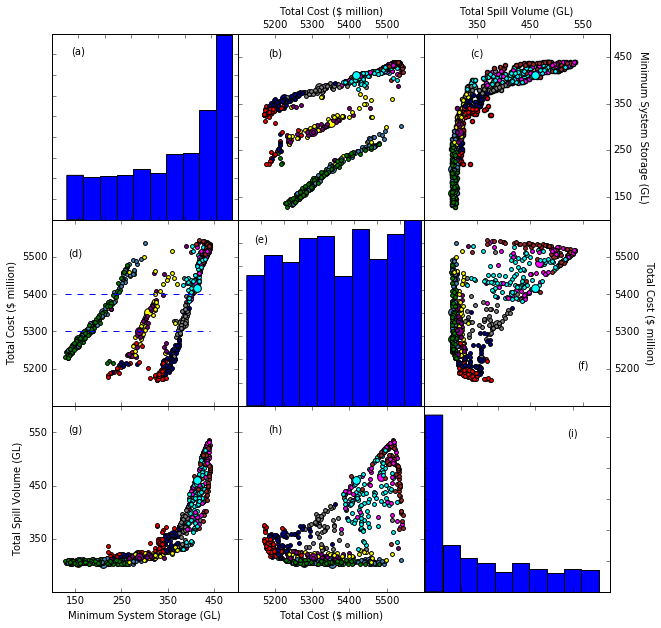

In [38]:
# Objective function and decision variable cluster set

fig, axes = plt.subplots(3, 3, figsize = [10,10])

# 1. Obj1 Histogram (Obj1 vs Obj1)
axes[0,0].hist(obj1, color = 'blue')
plt.setp(axes[0,0].get_xticklabels(), visible=False)
plt.setp(axes[0,0].get_yticklabels(), visible=False)
axes[0,0].text(min(axes[0,0].get_xticks()[1:]), max(axes[0,0].get_yticks()[:-1]), '(a)', ha = 'center')

# 2. Obj1 vs Obj2
for i in medcat:
    axes[0,1].scatter(obj2[i], obj1[i], s = 60, c = allclustcollist[i], marker = medmarks[allmedcat[i]])
axes[0,1].xaxis.tick_top()
axes[0,1].set_xticks(obj2ticks)
axes[0,1].xaxis.set_label_position('top')
axes[0,1].set_xlabel(obj2.name)
axes[0,1].set_yticks(obj1ticks)
plt.setp(axes[0,1].get_yticklabels(), visible=False)
axes[0,1].text(min(obj2ticks), max(obj1ticks), '(b)', ha = 'center')

# 3. Obj1 vs Obj3
axes[0,2].scatter(obj3, obj1)
for i in medcat:
    axes[0,2].scatter(obj3[i], obj1[i], s = 60, c = allclustcollist[i], marker = medmarks[allmedcat[i]])
axes[0,2].xaxis.tick_top()
axes[0,2].set_xticks(obj3ticks)
axes[0,2].xaxis.set_label_position('top')
axes[0,2].set_xlabel(obj3.name)
axes[0,2].yaxis.tick_right()
axes[0,2].set_yticks(obj1ticks)
axes[0,2].yaxis.set_label_position('right')
axes[0,2].set_ylabel(obj1.name, rotation = 270, va = 'bottom')
axes[0,2].text(min(obj3ticks), max(obj1ticks), '(c)', ha = 'center')
    
# 4. Obj2 vs Obj1
for i in medcat:
    axes[1,0].scatter(obj1[i], obj2[i], s = 60, c = allclustcollist[i], marker = medmarks[allmedcat[i]])
axes[1,0].hlines([5300, 5400], obj1.min(), obj1.max(), colors = ['blue','blue'], linestyle = 'dashed')
axes[1,0].set_xticks(obj1ticks)
plt.setp(axes[1,0].get_xticklabels(), visible=False)
axes[1,0].set_yticks(obj2ticks)
axes[1,0].set_ylabel(obj2.name)
axes[1,0].text(min(obj1ticks), max(obj2ticks), '(d)', ha = 'center')

# 5. Obj2 Histogram (Obj 2 vs Obj 2)
axes[1,1].hist(obj2, color = 'blue')
plt.setp(axes[1,1].get_xticklabels(), visible=False)
plt.setp(axes[1,1].get_yticklabels(), visible=False)
axes[1,1].text(min(axes[1,1].get_xticks()[1:]), max(axes[1,1].get_yticks()[:-1]), '(e)', ha = 'center')

# 6. Obj2 vs Obj 3
for i in medcat:
    axes[1,2].scatter(obj3[i], obj2[i], s = 60, c = allclustcollist[i], marker = medmarks[allmedcat[i]])
axes[1,2].set_xticks(obj3ticks)
plt.setp(axes[1,2].get_xticklabels(), visible=False)
axes[1,2].yaxis.tick_right()
axes[1,2].set_yticks(obj2ticks)
axes[1,2].yaxis.set_label_position('right')
axes[1,2].set_ylabel(obj2.name, rotation = 270, va = 'bottom')
axes[1,2].text(max(obj3ticks), min(obj2ticks), '(f)', ha = 'center')

# 7. Obj3 vs Obj1
for i in medcat:
    axes[2,0].scatter(obj1[i], obj3[i], s = 60, c = allclustcollist[i], marker = medmarks[allmedcat[i]])
axes[2,0].set_xticks(obj1ticks)
axes[2,0].set_xlabel(obj1.name)
axes[2,0].set_yticks(obj3ticks)
axes[2,0].set_ylabel(obj3.name)
axes[2,0].text(min(obj1ticks), max(obj3ticks), '(g)', ha = 'center')

# 8. Obj3 vs Obj2
for i in medcat:
    axes[2,1].scatter(obj2[i], obj3[i], s = 60, c = allclustcollist[i], marker = medmarks[allmedcat[i]])
axes[2,1].set_xticks(obj2ticks)
axes[2,1].set_xlabel(obj2.name)
axes[2,1].set_yticks(obj3ticks)
plt.setp(axes[2,1].get_yticklabels(), visible=False)
axes[2,1].text(min(obj2ticks), max(obj3ticks), '(h)', ha = 'center')

# 9. Obj3 Histogram (Obj3 vs Obj3)
axes[2,2].hist(obj3, color = 'blue')
plt.setp(axes[2,2].get_xticklabels(), visible=False)
plt.setp(axes[2,2].get_yticklabels(), visible=False)
axes[2,2].text(max(axes[2,2].get_xticks()[:-1]), max(axes[2,2].get_yticks()[:-1]), '(i)', ha = 'center')

# Adjust surrounding space 
plt.subplots_adjust(wspace = 0, hspace = 0)

# uncheck below to save figure
#plt.savefig('Cluster Analysis/scatterplot matrix pareto front all clustered.png', dpi=150, bbox_inches='tight')

In [41]:
plt.close(fig)